In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [214]:
train = pd.read_csv('data/ODIR-5K_Training_Annotations(Updated)_V2.csv')

In [215]:
train.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [216]:
corr = train.apply(lambda x: x['Left-Diagnostic Keywords'] == x['Right-Diagnostic Keywords'], axis=1)

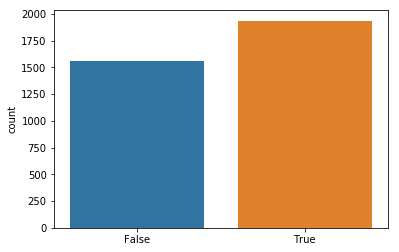

In [217]:
sns.countplot(corr)

In [218]:
summ = train.apply(lambda x: x['N'] + x['D'] + x['G'] + x['C'] + x['A'] + x['H'] + x['M'] + x['O'], axis=1)
summ.value_counts()

1    2914
2     557
3      29
dtype: int64

In [219]:
ind = []
for i in range(len(summ)):
    if summ[i] == 3:
        ind.append(i)

In [220]:
train.iloc[ind]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
188,188,55,Female,188_left.jpg,188_right.jpg,laser spot，severe proliferative diabetic retin...,cataract,0,1,0,1,0,0,0,1
304,305,55,Male,305_left.jpg,305_right.jpg,"hypertensive retinopathy,diabetic retinopathy",hypertensive retinopathy，macular epiretinal me...,0,1,0,0,0,1,0,1
624,625,72,Female,625_left.jpg,625_right.jpg,cataract，suspected glaucoma,cataract，branch retinal vein occlusion,0,0,1,1,0,0,0,1
935,938,76,Male,938_left.jpg,938_right.jpg,dry age-related macular degeneration，myopia re...,diabetic retinopathy，dry age-related macular d...,0,1,0,0,1,0,1,0
1007,1020,67,Male,1020_left.jpg,1020_right.jpg,glaucoma，intraretinal hemorrhage,myopia retinopathy,0,0,1,0,0,0,1,1
1186,1263,62,Male,1263_left.jpg,1263_right.jpg,old central retinal vein occlusion,glaucoma，hypertensive retinopathy,0,0,1,0,0,1,0,1
1219,1303,49,Male,1303_left.jpg,1303_right.jpg,glaucoma，central retinal vein occlusion,hypertensive retinopathy,0,0,1,0,0,1,0,1
1265,1410,69,Female,1410_left.jpg,1410_right.jpg,suspected glaucoma，refractive media opacity,mild nonproliferative retinopathy,0,1,1,0,0,0,0,1
1293,1442,63,Male,1442_left.jpg,1442_right.jpg,glaucoma，mild nonproliferative retinopathy，mac...,pigmentation disorder,0,1,1,0,0,0,0,1
1313,1474,79,Female,1474_left.jpg,1474_right.jpg,glaucoma，moderate non proliferative retinopathy,drusen,0,1,1,0,0,0,0,1


Чекнем контрольные суммы лейблов

In [268]:
labels = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
for label in labels:
    print(train[label].sum())

1140
1128
215
212
164
103
174
979


In [221]:
left_unique_full = train['Left-Diagnostic Keywords'].unique()
right_unique_full = train['Right-Diagnostic Keywords'].unique()

In [222]:
left_unique = []
right_unique = []
for label in left_unique_full:
    left_unique.extend(label.split('，'))
for label in right_unique_full:
    right_unique.extend(label.split('，'))

In [223]:
left_unique = list(set(left_unique))
right_unique = list(set(right_unique))
unique = []
for label in left_unique:
    unique.extend(label.split(','))
for label in right_unique:
    unique.extend(label.split(','))
unique_diagnosis = list(set(unique))
len(unique_diagnosis)

102

In [224]:
for diagnosis in unique_diagnosis:
    if 'retinopathy' in diagnosis:
        print(diagnosis)

old chorioretinopathy
suspicious diabetic retinopathy
hypertensive retinopathy
suspected moderate non proliferative retinopathy
central serous chorioretinopathy
mild nonproliferative retinopathy
diabetic retinopathy
severe proliferative diabetic retinopathy
myopia retinopathy
suspected diabetic retinopathy
proliferative diabetic retinopathy
myopic retinopathy
moderate non proliferative retinopathy
severe nonproliferative retinopathy


In [225]:
for diagnosis in unique_diagnosis:
    if 'macular degeneration' in diagnosis:
        print(diagnosis)

wet age-related macular degeneration
dry age-related macular degeneration
age-related macular degeneration


Хуевый путь матчинга картинок и лейблов был представлен выше, начнем нормально - от лейблов к кейвордам

In [226]:
train['all_keywords'] = train.apply(lambda x: x['Left-Diagnostic Keywords'] + '，' + x['Right-Diagnostic Keywords'], axis=1)

In [227]:
train.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,all_keywords
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,cataract，normal fundus
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,normal fundus，normal fundus
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,laser spot，moderate non proliferative retinopa...
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1,normal fundus，branch retinal artery occlusion
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,macular epiretinal membrane，mild nonproliferat...


In [228]:
normal = []
diabetic = []
glaucoma = []
cataract = []
amd = []
hypertension = []
myopia = []
other = []
for index, row in train.iterrows():
    if row['N'] == 1:
        normal.extend(row['all_keywords'].split('，'))
    if row['D'] == 1:
        diabetic.extend(row['all_keywords'].split('，'))
    if row['G'] == 1:
        glaucoma.extend(row['all_keywords'].split('，'))
    if row['C'] == 1:
        cataract.extend(row['all_keywords'].split('，'))
    if row['A'] == 1:
        amd.extend(row['all_keywords'].split('，'))
    if row['H'] == 1:
        hypertension.extend(row['all_keywords'].split('，'))
    if row['M'] == 1:
        myopia.extend(row['all_keywords'].split('，'))
    if row['O'] == 1:
        other.extend(row['all_keywords'].split('，'))

Начнем по порядку с примеров где оба глаза здоровых

In [236]:
print(set(normal))

{'lens dust', 'low image quality', 'normal fundus'}


Че? Ща посмотрим

In [237]:
dust = train.apply(lambda x:  'lens dust' in x['all_keywords'], axis=1)

In [238]:
dust.value_counts()

False    3235
True      265
dtype: int64

265 примеров с пылью, круто. Посмотрим, на сколько критично

In [259]:
for i in range(len(dust)):
    if dust[i]:
        print(train.iloc[i])
        break

ID                                                                          20
Patient Age                                                                 64
Patient Sex                                                             Female
Left-Fundus                                                        20_left.jpg
Right-Fundus                                                      20_right.jpg
Left-Diagnostic Keywords                     rhegmatogenous retinal detachment
Right-Diagnostic Keywords                              lens dust，normal fundus
N                                                                            0
D                                                                            0
G                                                                            0
C                                                                            0
A                                                                            0
H                                                   

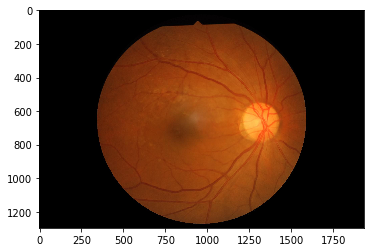

In [260]:
im = cv2.imread('data/ODIR-5K_Training_Images/20_right.jpg')[..., :: -1]
plt.imshow(im)

Хуй знает, вроде норм, пока оставим, тем более их довольно много. Глянем че там по качеству

In [241]:
low = train.apply(lambda x:  'low image quality' in x['all_keywords'], axis=1)

In [242]:
low.value_counts()

False    3481
True       19
dtype: int64

Ну этих хотя бы поменьше

In [261]:
for i in range(len(low)):
    if low[i]:
        print(train.iloc[i])
        break

ID                                                                       372
Patient Age                                                               52
Patient Sex                                                           Female
Left-Fundus                                                     372_left.jpg
Right-Fundus                                                   372_right.jpg
Left-Diagnostic Keywords                       low image quality,maculopathy
Right-Diagnostic Keywords                                  low image quality
N                                                                          0
D                                                                          0
G                                                                          0
C                                                                          0
A                                                                          0
H                                                                          0

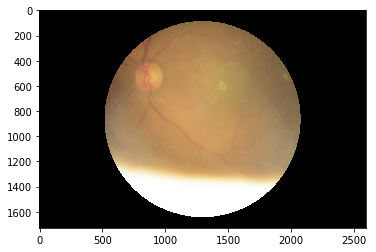

In [262]:
im = cv2.imread('data/ODIR-5K_Training_Images/372_left.jpg')[..., :: -1]
plt.imshow(im)

В общем какие-то испорченные примеры, выкинем их нахуй видимо. Переходим ко второму пункту - диабетическая ретинопатия

In [253]:
dummy = []
for label in diabetic:
    dummy.extend(label.split(','))

for label in diabetic:
    if 'retinopathy' in label:
        print(label)

suspected moderate non proliferative retinopathy
moderate non proliferative retinopathy
suspicious diabetic retinopathy
severe nonproliferative retinopathy
diabetic retinopathy
severe proliferative diabetic retinopathy
myopia retinopathy
mild nonproliferative retinopathy
hypertensive retinopathy
suspected diabetic retinopathy
proliferative diabetic retinopathy


Тут все вроде как относится к диабетической ретинопатии, кроме двух. Чекнем

In [264]:
mr = train.apply(lambda x:  'myopia retinopathy' in x['all_keywords'], axis=1)
for i in range(len(mr)):
    if mr[i]:
        print(train.iloc[i])
        break

ID                                                                         375
Patient Age                                                                 64
Patient Sex                                                               Male
Left-Fundus                                                       375_left.jpg
Right-Fundus                                                     375_right.jpg
Left-Diagnostic Keywords       punctate inner choroidopathy，myopia retinopathy
Right-Diagnostic Keywords      punctate inner choroidopathy，myopia retinopathy
N                                                                            0
D                                                                            0
G                                                                            0
C                                                                            0
A                                                                            0
H                                                   

Да, это относится к миопии

In [265]:
mr = train.apply(lambda x:  'hypertensive retinopathy' in x['all_keywords'], axis=1)
for i in range(len(mr)):
    if mr[i]:
        print(train.iloc[i])
        break

ID                                                                          11
Patient Age                                                                 60
Patient Sex                                                             Female
Left-Fundus                                                        11_left.jpg
Right-Fundus                                                      11_right.jpg
Left-Diagnostic Keywords     moderate non proliferative retinopathy，hyperte...
Right-Diagnostic Keywords    moderate non proliferative retinopathy，hyperte...
N                                                                            0
D                                                                            1
G                                                                            0
C                                                                            0
A                                                                            0
H                                                   

А эта хуйня к гипертензии. Значит все норм, идем дальше

In [266]:
dummy = []
for label in glaucoma:
    dummy.extend(label.split(','))
glaucoma = list(set(glaucoma))

In [267]:
glaucoma

['macular epiretinal membrane',
 'diffuse retinal atrophy',
 'suspected glaucoma',
 'central retinal vein occlusion',
 'moderate non proliferative retinopathy',
 'pathological myopia',
 'white vessel',
 'cataract',
 'post laser photocoagulation',
 'dry age-related macular degeneration',
 'myelinated nerve fibers',
 'wet age-related macular degeneration',
 'maculopathy',
 'intraretinal hemorrhage',
 'macular pigmentation disorder',
 'suspicious diabetic retinopathy',
 'fundus laser photocoagulation spots',
 'image offset',
 'chorioretinal atrophy',
 'optic disk photographically invisible',
 'glaucoma',
 'branch retinal vein occlusion',
 'lens dust',
 'vitreous degeneration',
 'diabetic retinopathy',
 'pigmentation disorder',
 'myopia retinopathy',
 'laser spot',
 'drusen',
 'optic nerve atrophy',
 'tessellated fundus',
 'mild nonproliferative retinopathy',
 'hypertensive retinopathy',
 'normal fundus',
 'refractive media opacity',
 'myopic maculopathy',
 'old central retinal vein occlus